In [336]:
import h2o
import pandas as pd
from h2o.estimators.deeplearning import H2ODeepLearningEstimator
h2o.init()



Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,10 mins 50 secs
H2O_cluster_timezone:,America/New_York
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.0.3
H2O_cluster_version_age:,1 month and 19 days
H2O_cluster_name:,deven
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.450 Gb
H2O_cluster_total_cores:,8
H2O_cluster_allowed_cores:,8
H2O_cluster_status:,"locked, healthy"


In [337]:
import h2o

main = h2o.import_file(r"C:\Users\deven\Downloads\5G_Data\Network-Slicing\5G-Network-Slicing.csv")

train,test,valid = main.split_frame(ratios=[.7, .15])




Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [338]:
train.head()

Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)
Smartphone,1,LTE/5G,Monday,1,1,0.01,<50ms,eMBB
Smartphone,1,LTE/5G,Monday,1,2,0.01,<50ms,eMBB
Smartphone,1,LTE/5G,Monday,1,3,0.01,<50ms,eMBB
Smartphone,1,LTE/5G,Monday,1,65,0.01,<50ms,eMBB
Smartphone,1,LTE/5G,Monday,1,66,0.01,<50ms,eMBB
Smartphone,1,LTE/5G,Monday,1,5,0.01,<50ms,eMBB
Smartphone,1,LTE/5G,Monday,1,6,0.01,<50ms,eMBB
Smartphone,1,LTE/5G,Monday,1,7,0.01,<50ms,eMBB
Smartphone,1,LTE/5G,Monday,1,8,0.01,<50ms,eMBB
Smartphone,1,LTE/5G,Monday,1,9,0.01,<50ms,eMBB


In [339]:
train.describe()

Rows:327060
Cols:9




,Use CaseType (Input 1),LTE/5G UE Category (Input 2),Technology Supported (Input 3),Day (Input4),Time (Input 5),QCI (Input 6),Packet Loss Rate (Reliability),Packet Delay Budget (Latency),Slice Type (Output)
type,enum,int,enum,enum,int,int,real,enum,enum
mins,,0.0,,,1.0,1.0,1e-06,,
mean,,10.450153778762173,,,12.00276401883447,24.23557145477893,0.003991812713263621,,
maxs,,20.0,,,23.0,70.0,0.01,,
sigma,,5.797685927502489,,,6.633382216140571,28.951362961059015,0.004642946445901534,,
zeros,,1456,,,0,0,0,,
missing,0,2893,0,0,0,0,0,0,0
0,Smartphone,1.0,LTE/5G,Monday,1.0,1.0,0.01,<50ms,eMBB
1,Smartphone,1.0,LTE/5G,Monday,1.0,2.0,0.01,<50ms,eMBB
2,Smartphone,1.0,LTE/5G,Monday,1.0,3.0,0.01,<50ms,eMBB


In [340]:
model = H2ODeepLearningEstimator(hidden=[18,9],
                                 activation="RectifierWithDropout",
                                 hidden_dropout_ratios=[0.5,0.5],
                                 epochs=50,
                                 seed=7351,
                                 missing_values_handling = "mean_imputation",
                                 # stop model building if the logloss on the validation set does not improve at all for 5 consecutive scoring epochs
                                 stopping_rounds=5, 
                                 stopping_tolerance=0,
                                 stopping_metric="logloss",
                                 auc_type = "MACRO_OVR"
)

In [341]:
model.train (x=list(range(0,8)), y='Slice Type (Output)',training_frame=train,validation_frame=valid)

deeplearning Model Build progress: |█████████████████████████████████████████████| (done) 100%
Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1649118225515_5


Status of Neuron Layers: predicting Slice Type (Output), 3-class classification, multinomial distribution, CrossEntropy loss, 723 weights/biases, 15.9 KB, 8,300,413 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,28,Input,0.0,,,,,,,,,
1,,2,18,RectifierDropout,50.0,0.0,0.0,0.320981,0.430067,0.0,0.268151,1.337354,-0.688533,0.954035
2,,3,9,RectifierDropout,50.0,0.0,0.0,0.565872,0.444686,0.0,1.180369,2.286946,-1.043813,3.85886
3,,4,3,Softmax,,0.0,0.0,0.440808,0.409715,0.0,-4.489708,8.599365,-90.258842,1.98782




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.007713035126191927
RMSE: 0.08782388699090884
LogLoss: 0.04021900622814345
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0

Multinomial AUC values: 


,type,first_class_domain,second_class_domain,auc
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Multinomial auc_pr values: 


,type,first_class_domain,second_class_domain,auc_pr
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,URLLC,eMBB,mMTC,Error,Rate
0,4323.0,0.0,0.0,0.0,"0 / 4,323"
1,0.0,2745.0,0.0,0.0,"0 / 2,745"
2,0.0,0.0,2790.0,0.0,"0 / 2,790"
3,4323.0,2745.0,2790.0,0.0,"0 / 9,858"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0



ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.008127826040801731
RMSE: 0.09015445657759649
LogLoss: 0.04192631414534343
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0

Multinomial AUC values: 


,type,first_class_domain,second_class_domain,auc
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Multinomial auc_pr values: 


,type,first_class_domain,second_class_domain,auc_pr
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,URLLC,eMBB,mMTC,Error,Rate
0,31426.0,0.0,0.0,0.0,"0 / 31,426"
1,0.0,18738.0,0.0,0.0,"0 / 18,738"
2,0.0,0.0,19753.0,0.0,"0 / 19,753"
3,31426.0,18738.0,19753.0,0.0,"0 / 69,917"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_r2,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-04-04 20:34:37,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-04-04 20:34:37,0.515 sec,716321 obs/sec,0.306626,1,100285.0,0.443287,1.289981,0.718219,0.176811,0.964978,0.969326,0.446837,1.311780,0.716437,0.179999,0.957147,0.96701
2,,2022-04-04 20:34:42,5.473 sec,823465 obs/sec,12.236415,40,4002042.0,0.167726,0.075246,0.959659,0.088558,1.000000,1.000000,0.169204,0.076594,0.959339,0.089892,1.000000,1.00000
3,,2022-04-04 20:34:47,10.532 sec,858367 obs/sec,25.378869,83,8300413.0,0.087824,0.040219,0.988940,0.000000,1.000000,1.000000,0.090154,0.041926,0.988457,0.000000,1.000000,1.00000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Use CaseType (Input 1).Smartphone,1.000000,1.000000,0.155752
1,Packet Delay Budget (Latency).<10ms,0.860048,0.860048,0.133954
2,Technology Supported (Input 3).LTE/5G,0.608776,0.608776,0.094818
3,Packet Delay Budget (Latency).<50ms,0.510782,0.510782,0.079555
4,"Technology Supported (Input 3).IoT (LTE-M, NB-IoT)",0.400741,0.400741,0.062416
5,Use CaseType (Input 1).Smart Transportation,0.396375,0.396375,0.061736
6,Use CaseType (Input 1).AR/VR/Gaming,0.373484,0.373484,0.058171
7,Use CaseType (Input 1).Public Safety/E911,0.360970,0.360970,0.056222
8,Packet Delay Budget (Latency).<300ms,0.353136,0.353136,0.055002
9,Use CaseType (Input 1).Healthcare,0.353092,0.353092,0.054995



See the whole table with table.as_data_frame()


In [342]:
scoringhistory = model.scoring_history
scoringhistory

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_model_python_1649118225515_5


Status of Neuron Layers: predicting Slice Type (Output), 3-class classification, multinomial distribution, CrossEntropy loss, 723 weights/biases, 15.9 KB, 8,300,413 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,28,Input,0.0,,,,,,,,,
1,,2,18,RectifierDropout,50.0,0.0,0.0,0.320981,0.430067,0.0,0.268151,1.337354,-0.688533,0.954035
2,,3,9,RectifierDropout,50.0,0.0,0.0,0.565872,0.444686,0.0,1.180369,2.286946,-1.043813,3.85886
3,,4,3,Softmax,,0.0,0.0,0.440808,0.409715,0.0,-4.489708,8.599365,-90.258842,1.98782




ModelMetricsMultinomial: deeplearning
** Reported on train data. **

MSE: 0.007713035126191927
RMSE: 0.08782388699090884
LogLoss: 0.04021900622814345
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0

Multinomial AUC values: 


,type,first_class_domain,second_class_domain,auc
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Multinomial auc_pr values: 


,type,first_class_domain,second_class_domain,auc_pr
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,URLLC,eMBB,mMTC,Error,Rate
0,4323.0,0.0,0.0,0.0,"0 / 4,323"
1,0.0,2745.0,0.0,0.0,"0 / 2,745"
2,0.0,0.0,2790.0,0.0,"0 / 2,790"
3,4323.0,2745.0,2790.0,0.0,"0 / 9,858"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0



ModelMetricsMultinomial: deeplearning
** Reported on validation data. **

MSE: 0.008127826040801731
RMSE: 0.09015445657759649
LogLoss: 0.04192631414534343
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0

Multinomial AUC values: 


,type,first_class_domain,second_class_domain,auc
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Multinomial auc_pr values: 


,type,first_class_domain,second_class_domain,auc_pr
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,URLLC,eMBB,mMTC,Error,Rate
0,31426.0,0.0,0.0,0.0,"0 / 31,426"
1,0.0,18738.0,0.0,0.0,"0 / 18,738"
2,0.0,0.0,19753.0,0.0,"0 / 19,753"
3,31426.0,18738.0,19753.0,0.0,"0 / 69,917"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_r2,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-04-04 20:34:37,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-04-04 20:34:37,0.515 sec,716321 obs/sec,0.306626,1,100285.0,0.443287,1.289981,0.718219,0.176811,0.964978,0.969326,0.446837,1.311780,0.716437,0.179999,0.957147,0.96701
2,,2022-04-04 20:34:42,5.473 sec,823465 obs/sec,12.236415,40,4002042.0,0.167726,0.075246,0.959659,0.088558,1.000000,1.000000,0.169204,0.076594,0.959339,0.089892,1.000000,1.00000
3,,2022-04-04 20:34:47,10.532 sec,858367 obs/sec,25.378869,83,8300413.0,0.087824,0.040219,0.988940,0.000000,1.000000,1.000000,0.090154,0.041926,0.988457,0.000000,1.000000,1.00000



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Use CaseType (Input 1).Smartphone,1.000000,1.000000,0.155752
1,Packet Delay Budget (Latency).<10ms,0.860048,0.860048,0.133954
2,Technology Supported (Input 3).LTE/5G,0.608776,0.608776,0.094818
3,Packet Delay Budget (Latency).<50ms,0.510782,0.510782,0.079555
4,"Technology Supported (Input 3).IoT (LTE-M, NB-IoT)",0.400741,0.400741,0.062416
5,Use CaseType (Input 1).Smart Transportation,0.396375,0.396375,0.061736
6,Use CaseType (Input 1).AR/VR/Gaming,0.373484,0.373484,0.058171
7,Use CaseType (Input 1).Public Safety/E911,0.360970,0.360970,0.056222
8,Packet Delay Budget (Latency).<300ms,0.353136,0.353136,0.055002
9,Use CaseType (Input 1).Healthcare,0.353092,0.353092,0.054995



See the whole table with table.as_data_frame()


<bound method ModelBase.scoring_history of >

In [343]:
sh = model.score_history()
sh = pd.DataFrame(sh)
print(sh.columns)

Index(['', 'timestamp', 'duration', 'training_speed', 'epochs', 'iterations',
       'samples', 'training_rmse', 'training_logloss', 'training_r2',
       'training_classification_error', 'training_auc', 'training_pr_auc',
       'validation_rmse', 'validation_logloss', 'validation_r2',
       'validation_classification_error', 'validation_auc',
       'validation_pr_auc'],
      dtype='object')


In [344]:
sh.head()

,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_logloss,training_r2,training_classification_error,training_auc,training_pr_auc,validation_rmse,validation_logloss,validation_r2,validation_classification_error,validation_auc,validation_pr_auc
0,,2022-04-04 20:34:37,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,,2022-04-04 20:34:37,0.515 sec,716321 obs/sec,0.306626,1,100285.0,0.443287,1.289981,0.718219,0.176811,0.964978,0.969326,0.446837,1.311780,0.716437,0.179999,0.957147,0.96701
2,,2022-04-04 20:34:42,5.473 sec,823465 obs/sec,12.236415,40,4002042.0,0.167726,0.075246,0.959659,0.088558,1.000000,1.000000,0.169204,0.076594,0.959339,0.089892,1.000000,1.00000
3,,2022-04-04 20:34:47,10.532 sec,858367 obs/sec,25.378869,83,8300413.0,0.087824,0.040219,0.988940,0.000000,1.000000,1.000000,0.090154,0.041926,0.988457,0.000000,1.000000,1.00000


### H2O-3 calculates regression metrics for classification problems.

<AxesSubplot:xlabel='epochs'>

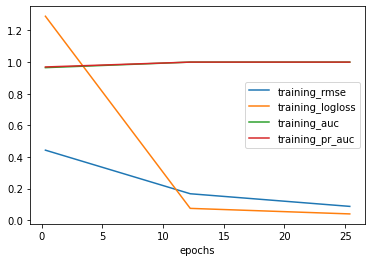

In [345]:
import matplotlib.pyplot as plt
%matplotlib inline 
# plot training logloss and auc
sh.plot(x='epochs', y = ['training_rmse', 'training_logloss' ,'training_auc', 'training_pr_auc'])

<AxesSubplot:xlabel='epochs'>

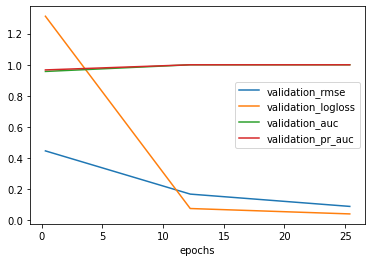

In [346]:
sh.plot(x='epochs', y = ['validation_rmse', 'validation_logloss' , 'validation_auc', 'validation_pr_auc'])

In [347]:
model.confusion_matrix(valid)


Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,URLLC,eMBB,mMTC,Error,Rate
0,31426.0,0.0,0.0,0.0,"0 / 31,426"
1,0.0,18738.0,0.0,0.0,"0 / 18,738"
2,0.0,0.0,19753.0,0.0,"0 / 19,753"
3,31426.0,18738.0,19753.0,0.0,"0 / 69,917"


In [348]:
model.mse()

0.007713035126191927

### Predicting using the Entire Test Dataframe and Looking at Test Performance

In [349]:
predictions = model.predict(test)
predictions.head()

deeplearning prediction progress: |██████████████████████████████████████████████| (done) 100%


predict,URLLC,eMBB,mMTC
eMBB,0,1,0
eMBB,0,1,0
eMBB,0,1,0
eMBB,0,1,0
eMBB,0,1,0
eMBB,0,1,0
eMBB,0,1,0
eMBB,0,1,0
eMBB,0,1,0
eMBB,0,1,0


In [350]:
testmetrics = model.model_performance(test_data=test)

In [351]:
testmetrics.auc()

1.0

In [352]:
testmetrics



ModelMetricsMultinomial: deeplearning
** Reported on test data. **

MSE: 0.008015854580081257
RMSE: 0.08953130502836008
LogLoss: 0.04152576524137541
Mean Per-Class Error: 0.0
AUC: 1.0
AUCPR: 1.0

Multinomial AUC values: 


,type,first_class_domain,second_class_domain,auc
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Multinomial auc_pr values: 


,type,first_class_domain,second_class_domain,auc_pr
0,URLLC vs Rest,URLLC,None,1.0
1,eMBB vs Rest,eMBB,None,1.0
2,mMTC vs Rest,mMTC,None,1.0
3,Macro OVR,None,None,1.0
4,Weighted OVR,None,None,1.0
5,Class URLLC vs. eMBB,URLLC,eMBB,1.0
6,Class URLLC vs. mMTC,URLLC,mMTC,1.0
7,Class eMBB vs. mMTC,eMBB,mMTC,1.0
8,Macro OVO,None,None,1.0
9,Weighted OVO,None,None,1.0



Confusion Matrix: Row labels: Actual class; Column labels: Predicted class


,URLLC,eMBB,mMTC,Error,Rate
0,31352.0,0.0,0.0,0.0,"0 / 31,352"
1,0.0,18772.0,0.0,0.0,"0 / 18,772"
2,0.0,0.0,19638.0,0.0,"0 / 19,638"
3,31352.0,18772.0,19638.0,0.0,"0 / 69,762"



Top-3 Hit Ratios: 


,k,hit_ratio
0,1,1.0
1,2,1.0
2,3,1.0


In [353]:
# model.explain(test)

In [354]:
model.save_mojo("C:\\Users\\deven\\Desktop")

'C:\\Users\\deven\\Desktop\\DeepLearning_model_python_1649118225515_5.zip'